In [1]:
import sys
sys.path.append("D:/Zoo/Gull/geoVeRoPy")
import geoVeRoPy
import shapely
import matplotlib.pyplot as plt

import math
import random
# %matplotlib notebook

In [14]:
nodes = {
    1: {'loc': (45, 68)},
    2: {'loc': (45, 70)},
    3: {'loc': (42, 66)},
    4: {'loc': (42, 68)},
    5: {'loc': (42, 65)},
    6: {'loc': (40, 69)},
    7: {'loc': (40, 66)},
    8: {'loc': (38, 68)},
    9: {'loc': (38, 70)},
   10: {'loc': (35, 66)},
   11: {'loc': (35, 69)},
   12: {'loc': (25, 85)},
   13: {'loc': (22, 75)},
   14: {'loc': (22, 85)},
   15: {'loc': (20, 80)},
   16: {'loc': (20, 85)},
   17: {'loc': (18, 75)},
   18: {'loc': (15, 75)},
   19: {'loc': (15, 80)},
   20: {'loc': (30, 50)},
   21: {'loc': (30, 52)},
   22: {'loc': (28, 52)},
   23: {'loc': (28, 55)},
   24: {'loc': (25, 50)},
   25: {'loc': (25, 52)},
   26: {'loc': (25, 55)},
   27: {'loc': (23, 52)},
   28: {'loc': (23, 55)},
   29: {'loc': (20, 50)},
   30: {'loc': (20, 55)},
   31: {'loc': (10, 35)},
   32: {'loc': (10, 40)},
   33: {'loc': ( 8, 40)},
   34: {'loc': ( 8, 45)},
   35: {'loc': ( 5, 35)},
   36: {'loc': ( 5, 45)},
   37: {'loc': ( 2, 40)},
   38: {'loc': ( 0, 40)},
   39: {'loc': ( 0, 45)},
   40: {'loc': (35, 30)},
   41: {'loc': (35, 32)},
   42: {'loc': (33, 32)},
   43: {'loc': (33, 35)},
   44: {'loc': (32, 30)},
   45: {'loc': (30, 30)},
   46: {'loc': (30, 32)},
   47: {'loc': (30, 35)},
   48: {'loc': (28, 30)},
   49: {'loc': (28, 35)},
   50: {'loc': (26, 32)},
   51: {'loc': (25, 30)},
   52: {'loc': (25, 35)},
   53: {'loc': (44,  5)},
   54: {'loc': (42, 10)},
   55: {'loc': (42, 15)},
   56: {'loc': (40,  5)},
   57: {'loc': (40, 15)},
   58: {'loc': (38,  5)},
   59: {'loc': (38, 15)},
   60: {'loc': (35,  5)},
   61: {'loc': (50, 30)},
   62: {'loc': (50, 35)},
   63: {'loc': (50, 40)},
   64: {'loc': (48, 30)},
   65: {'loc': (48, 40)},
   66: {'loc': (47, 35)},
   67: {'loc': (47, 40)},
   68: {'loc': (45, 30)},
   69: {'loc': (45, 35)},
   70: {'loc': (95, 30)},
   71: {'loc': (95, 35)},
   72: {'loc': (53, 30)},
   73: {'loc': (92, 30)},
   74: {'loc': (53, 35)},
   75: {'loc': (45, 65)},
   76: {'loc': (90, 35)},
   77: {'loc': (88, 30)},
   78: {'loc': (88, 35)},
   79: {'loc': (87, 30)},
   80: {'loc': (85, 25)},
   81: {'loc': (85, 35)},
   82: {'loc': (75, 55)},
   83: {'loc': (72, 55)},
   84: {'loc': (70, 58)},
   85: {'loc': (68, 60)},
   86: {'loc': (66, 55)},
   87: {'loc': (65, 55)},
   88: {'loc': (65, 60)},
   89: {'loc': (63, 58)},
   90: {'loc': (60, 55)},
   91: {'loc': (60, 60)},
   92: {'loc': (67, 85)},
   93: {'loc': (65, 85)},
   94: {'loc': (65, 82)},
   95: {'loc': (62, 80)},
   96: {'loc': (60, 80)},
   97: {'loc': (60, 85)},
   98: {'loc': (58, 75)},
   99: {'loc': (55, 80)},
  100: {'loc':  (55,85)},
}
startLoc = (40, 50)
endLoc = (40, 50)

In [15]:
radiusList = [1, 2]
for n in nodes:
    nodes[n]['scoreList'] = [7, 6]

In [2]:
radiusList = [5, 10, 15]

nodes = geoVeRoPy.rndNodes(
    nodeIDs = range(1, 31),
    xRange = [0, 300],
    yRange = [0, 300])
nodes = geoVeRoPy.rndNodeNeighbors(
    nodes = nodes,
    shape = 'IsoCircle',
    radiusList = radiusList)
for n in nodes:
    totalScore = 100 * random.random()
    nodes[n]['scoreList'] = [totalScore, 0.5 * totalScore, 0.25 * totalScore]

In [3]:
# nodes = geoVeRoPy.loadDictionary("D:/CEOP_Ins")

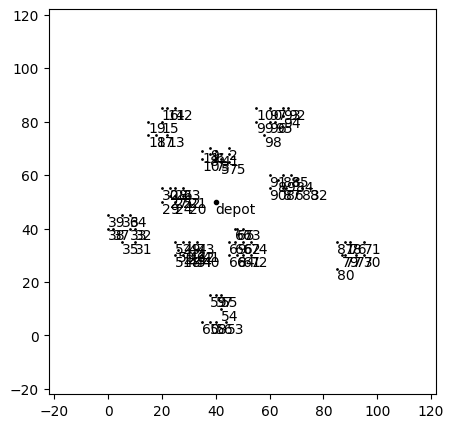

In [16]:
# for n in nodes:
#     nodes[n]['label'] = round(nodes[n]['scoreList'][0], 2)
fig, ax = geoVeRoPy.plotNodes(
    nodes = nodes,
    nodeColor = 'black',
    boundingBox = (-10, 110, -10, 110))
fig, ax = geoVeRoPy.plotNodes(
    fig = fig,
    ax = ax,
    nodeColor = 'black',
    nodes = {'depot': {'loc': startLoc}},
    nodeMarkerSize = 3)

In [5]:
geoVeRoPy.configSetLog("DEBUG_PRINT_LOG", True)

In [19]:
ceop = geoVeRoPy.solveGCEOP(
    startLoc = startLoc,
    endLoc = endLoc,
    nodes = nodes,
    popSize = 10,
    neighRatio = {
        'crossover': 0.6,
        'intraSwap': 0.05,
        'interSwap': 0.05,
        'exchange': 0.05,
        'rotate': 0.05,
        'rndDestroy': 0.05
    },
    radiusList = radiusList,
    maxLength = 550,
    stop = {
        'numIter': 40
    }
)

New Pop - Score: 307	Dist: 513.0224056851397
New Pop - Score: 355	Dist: 504.6348928068667
New Pop - Score: 396	Dist: 516.7206561874813
New Pop - Score: 258	Dist: 481.36389455209303
New Pop - Score: 413	Dist: 492.2270184164463
New Pop - Score: 342	Dist: 521.214440989996
New Pop - Score: 220	Dist: 523.8022526410982
New Pop - Score: 214	Dist: 528.5234535331485
New Pop - Score: 333	Dist: 522.7904153192349
New Pop - Score: 279	Dist: 457.9270033266405
Create offspring - Score: 266	Dist: 246.1848893663483
Create offspring - Score: 370	Dist: 503.264771024089
Create offspring - Score: 363	Dist: 524.8540178200412
Create offspring - Score: 299	Dist: 494.8092641731174
Create offspring - Score: 274	Dist: 263.0115879032045
Create offspring - Score: 292	Dist: 477.9465293729881
Create offspring - Score: 134	Dist: 171.8512250570553
Create offspring - Score: 411	Dist: 507.0645186540191
Remove - Score: 220	Dist: 523.8022526410982
Remove - Score: 258	Dist: 481.36389455209303
Remove - Score: 363	Dist: 524.

Create offspring - Score: 356	Dist: 517.9611955897556
Create offspring - Score: 303	Dist: 355.6846697152574
Create offspring - Score: 427	Dist: 491.23003004133966
Create offspring - Score: 418	Dist: 547.5328875260456
Create offspring - Score: 406	Dist: 500.92286693192943
Create offspring - Score: 326	Dist: 433.06071999235854
Create offspring - Score: 365	Dist: 428.4010212153968
Create offspring - Score: 420	Dist: 527.1269504117191
Remove - Score: 390	Dist: 542.9402783763805
Remove - Score: 365	Dist: 428.4010212153968
Remove - Score: 303	Dist: 355.6846697152574
Remove - Score: 399	Dist: 538.6457296344644
Remove - Score: 356	Dist: 517.9611955897556
Remove - Score: 415	Dist: 526.5296395184097
Remove - Score: 418	Dist: 547.5328875260456
Remove - Score: 259	Dist: 226.1877445520617
---------------------------------------------------------------------------
Iter: 9
Runtime [s]: 57.26
Dist: 510.1869705230637
Score: 487
Create offspring - Score: 398	Dist: 520.3655442316709
Create offspring - Sc

Create offspring - Score: 385	Dist: 500.15905769786116
Create offspring - Score: 223	Dist: 289.5464569277733
Create offspring - Score: 372	Dist: 400.978174741315
Create offspring - Score: 382	Dist: 532.6054313857827
Create offspring - Score: 470	Dist: 544.9906947167965
Create offspring - Score: 376	Dist: 522.698658000405
Create offspring - Score: 358	Dist: 543.4990131044073
Create offspring - Score: 232	Dist: 291.26213154642153
Remove - Score: 385	Dist: 500.15905769786116
Remove - Score: 444	Dist: 545.1479744736096
Remove - Score: 376	Dist: 522.698658000405
Remove - Score: 475	Dist: 543.3589408001783
Remove - Score: 470	Dist: 544.9906947167965
Remove - Score: 382	Dist: 532.6054313857827
Remove - Score: 343	Dist: 489.57646701235427
Remove - Score: 426	Dist: 440.2529498871153
---------------------------------------------------------------------------
Iter: 18
Runtime [s]: 79.18
Dist: 540.9198332388287
Score: 492
Create offspring - Score: 439	Dist: 530.5142653432181
Create offspring - Sco

Create offspring - Score: 325	Dist: 520.5988626839861
Create offspring - Score: 349	Dist: 351.63796954919513
Create offspring - Score: 318	Dist: 414.17082119269173
Create offspring - Score: 348	Dist: 532.8730081095714
Create offspring - Score: 510	Dist: 549.2816657504679
Create offspring - Score: 403	Dist: 495.316914037663
Create offspring - Score: 436	Dist: 547.176272383447
Create offspring - Score: 343	Dist: 341.8267424690227
Remove - Score: 349	Dist: 351.63796954919513
Remove - Score: 325	Dist: 520.5988626839861
Remove - Score: 459	Dist: 534.3192743529794
Remove - Score: 318	Dist: 414.17082119269173
Remove - Score: 383	Dist: 549.7312472859429
Remove - Score: 424	Dist: 514.1124160485468
Remove - Score: 343	Dist: 341.8267424690227
Remove - Score: 404	Dist: 476.399916067359
---------------------------------------------------------------------------
Iter: 27
Runtime [s]: 98.74
Dist: 536.3330678987629
Score: 526
Create offspring - Score: 377	Dist: 541.5517793188112
Create offspring - Sco

Create offspring - Score: 391	Dist: 539.1706836558404
Create offspring - Score: 381	Dist: 464.7366458436289
Create offspring - Score: 402	Dist: 443.7923916067869
Create offspring - Score: 422	Dist: 523.2713957930031
Create offspring - Score: 406	Dist: 548.4323819861595
Create offspring - Score: 229	Dist: 320.5995059248906
Create offspring - Score: 482	Dist: 523.299093035727
Create offspring - Score: 383	Dist: 435.20563213952863
Remove - Score: 383	Dist: 435.20563213952863
Remove - Score: 317	Dist: 426.66212792180147
Remove - Score: 257	Dist: 257.51661833749176
Remove - Score: 432	Dist: 532.9256611170714
Remove - Score: 391	Dist: 539.1706836558404
Remove - Score: 406	Dist: 548.4323819861595
Remove - Score: 409	Dist: 549.6096232210191
Remove - Score: 422	Dist: 487.8413270382453
---------------------------------------------------------------------------
Iter: 36
Runtime [s]: 120.53
Dist: 536.3330678987629
Score: 526
Create offspring - Score: 381	Dist: 533.4096082221378
Create offspring - 

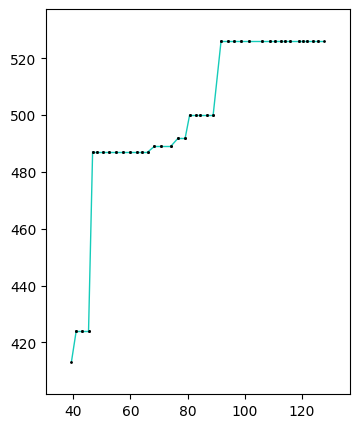

In [20]:
conv = []
for i in range(len(ceop['convergence'])):
    conv.append((ceop['convergence'][i]['runtime'], ceop['convergence'][i]['score']))
fig, ax = geoVeRoPy.plotLocSeq(locSeq = conv)

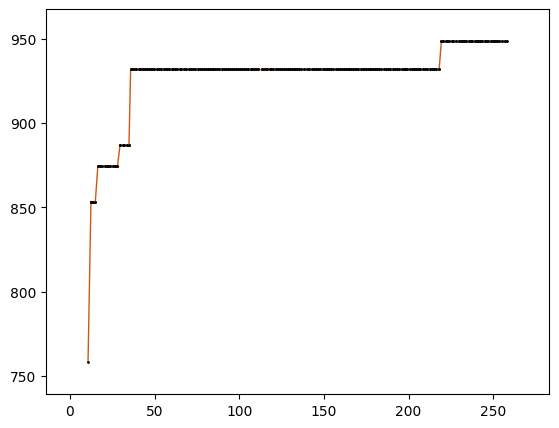

In [6]:
conv = []
for i in range(len(ceop['convergence'])):
    conv.append((ceop['convergence'][i]['runtime'], ceop['convergence'][i]['score']))
fig, ax = geoVeRoPy.plotLocSeq(locSeq = conv)

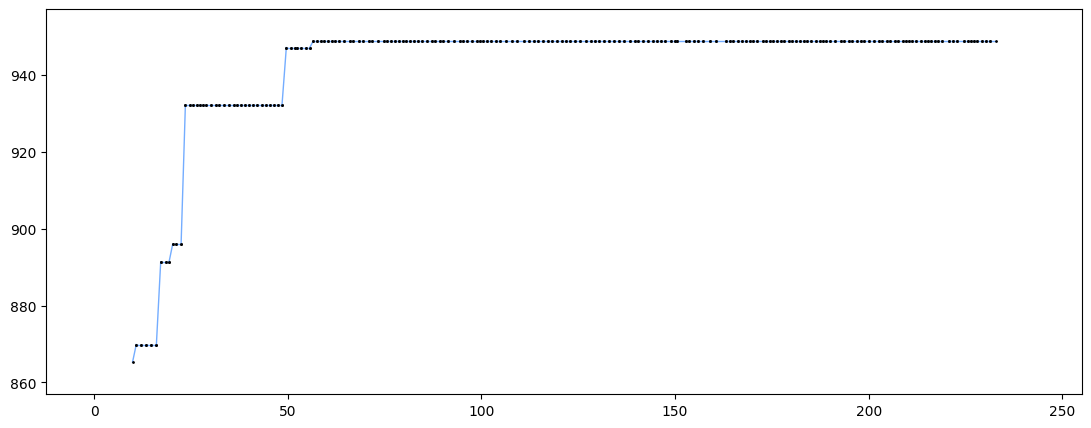

In [14]:
conv = []
for i in range(len(ceop['convergence'])):
    conv.append((ceop['convergence'][i]['runtime'], ceop['convergence'][i]['score']))
fig, ax = geoVeRoPy.plotLocSeq(locSeq = conv)

In [7]:
ceop['ofv'], ceop['dist']

(948.6473165008867, 547.3818315538612)

In [15]:
ceop['ofv'], ceop['dist']

(948.6473165008867, 547.3818315538612)

In [8]:
ceop['chromo'].turning

[[0, 0], [21, 0], [23, 2], [13, 0], [4, 0], [3, 0], [22, 0], [2, 0], [0, 0]]

In [9]:
ceop['chromo'].trespass

[(6, 0),
 (7, 0),
 (8, 2),
 (14, 0),
 (15, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (29, 0),
 (30, 0)]

Text(0.5, 1.0, 'Ofv: 948.6473165008867; Dist: 547.3818315538612')

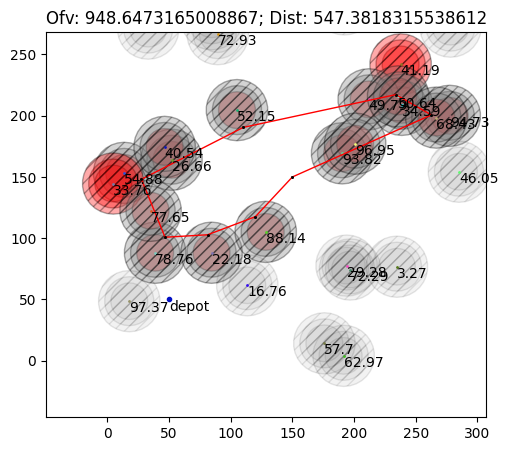

In [10]:
for n in nodes:
    nodes[n]['label'] = round(nodes[n]['scoreList'][0], 2)

visitedNodes = {}
unvisitedNodes = {}
for n in ceop['chromo'].turning:
    if (n[0] != 0):
        visitedNodes[n[0]] = nodes[n[0]]
        visitedNodes[n[0]]['actLevel'] = n[1]
for n in ceop['chromo'].trespass:
    if (n[0] != 0):
        visitedNodes[n[0]] = nodes[n[0]]
        visitedNodes[n[0]]['actLevel'] = n[1]
    
for n in nodes:
    if (n not in visitedNodes):
        unvisitedNodes[n] = nodes[n]
    
fig, ax = geoVeRoPy.plotNodes(
    nodes = visitedNodes,
    neighborColor = 'gray',
    neighborOpacity = 1,
    boundingBox = (-20, 120, -20, 120))
if (len(unvisitedNodes) > 0):
    fig, ax = geoVeRoPy.plotNodes(
        fig = fig,
        ax = ax,
        nodes = unvisitedNodes,
        neighborColor = 'gray',
        neighborOpacity = 0.3,
        boundingBox = (-20, 120, -20, 120))
fig, ax = geoVeRoPy.plotNodes(
    fig = fig,
    ax = ax,
    nodes = {'depot': {'loc': (50, 50)}},
    nodeMarkerSize = 3)
fig, ax = geoVeRoPy.plotLocSeq(
    fig = fig,
    ax = ax,
    lineColor = 'red',
    locSeq = ceop['path'])
ax.set_title(f"Ofv: {ceop['score']}; Dist: {ceop['dist']}")